In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# création du dataframe

df = pd.DataFrame({
    'Maths':[6,8,6,14.5,14,11,5.5,13,9],
    'Sciences':[6,8,7,14.5,14,10,7,12.5,9.5],
    'Francais':[5,8,11,15.5,12,5.5,14,8.5,12.5],
    'Latin':[5.5,8,9.5,15,12,7,11.5,9.5,12],
    'Musique':[8,9,11,8,10,13,10,12,18]
})

In [3]:
df.index = ['Jean', 'Jacques', 'Aline', 'Emeline','Antoine', 'Jules','Chloé','Jeanne','Béatrice']

In [4]:
df

Maths  Sciences  Francais  Latin  Musique
Jean        6.0       6.0       5.0    5.5        8
Jacques     8.0       8.0       8.0    8.0        9
Aline       6.0       7.0      11.0    9.5       11
Emeline    14.5      14.5      15.5   15.0        8
Antoine    14.0      14.0      12.0   12.0       10
Jules      11.0      10.0       5.5    7.0       13
Chloé       5.5       7.0      14.0   11.5       10
Jeanne     13.0      12.5       8.5    9.5       12
Béatrice    9.0       9.5      12.5   12.0       18

In [5]:
# exctration des valeurs sous forme matricielle
mat1 = df.values
print(mat1)
mat1.T

[[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.  10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]


array([[ 6. ,  8. ,  6. , 14.5, 14. , 11. ,  5.5, 13. ,  9. ],
       [ 6. ,  8. ,  7. , 14.5, 14. , 10. ,  7. , 12.5,  9.5],
       [ 5. ,  8. , 11. , 15.5, 12. ,  5.5, 14. ,  8.5, 12.5],
       [ 5.5,  8. ,  9.5, 15. , 12. ,  7. , 11.5,  9.5, 12. ],
       [ 8. ,  9. , 11. ,  8. , 10. , 13. , 10. , 12. , 18. ]])

In [6]:
# calcul des moyennes et écarts-types
means = [np.mean(vec) for vec in mat1.T]
stds = [np.std(vec) for vec in mat1.T]
means,stds

([9.666666666666666, 9.833333333333334, 10.222222222222221, 10.0, 11.0],
 [3.3747427885527643,
  2.9907264074877267,
  3.4729999129083966,
  2.7688746209726918,
  2.943920288775949])

In [7]:
# On centre, on réduit
mat1_c = np.array([(mat1.T[i]-means[i])/stds[i] for i in range(5)]).T

In [8]:
# on reconstruit le dataframe à partie des données centrées réduites
dfc = pd.DataFrame(data = mat1_c, index = df.index, columns=df.columns )
dfc

Maths  Sciences  Francais     Latin   Musique
Jean     -1.086503 -1.281740 -1.503663 -1.625209 -1.019049
Jacques  -0.493865 -0.613006 -0.639857 -0.722315 -0.679366
Aline    -1.086503 -0.947373  0.223950 -0.180579  0.000000
Emeline   1.432208  1.560379  1.519660  1.805788 -1.019049
Antoine   1.284048  1.393196  0.511885  0.722315 -0.339683
Jules     0.395092  0.055728 -1.359695 -1.083473  0.679366
Chloé    -1.234662 -0.947373  1.087756  0.541736 -0.339683
Jeanne    0.987730  0.891645 -0.495889 -0.180579  0.339683
Béatrice -0.197546 -0.111456  0.655853  0.722315  2.377782

In [10]:
# matrice des corrélations
mat1_corr = 1/len(mat1_c)*np.dot(mat1_c.T,mat1_c)

In [11]:
mat1_corr

array([[1.        , 0.98253573, 0.22673193, 0.49049826, 0.01118384],
       [0.98253573, 1.        , 0.39669324, 0.6339855 , 0.00630993],
       [0.22673193, 0.39669324, 1.        , 0.95613107, 0.03803599],
       [0.49049826, 0.6339855 , 0.95613107, 1.        , 0.08860159],
       [0.01118384, 0.00630993, 0.03803599, 0.08860159, 1.        ]])

In [12]:
# calcul des valeurs propres et vecteurs propres
D,V = eig(mat1_corr)

In [13]:
D


array([2.86181753e+00, 1.15068113e+00, 9.83140738e-01, 4.23484620e-04,
       3.93712053e-03])

In [14]:
# on transpose la matrice des vecteurs propres pour pouvoir les manipuler directement avec l'indice
V.T

array([[-0.47639106, -0.53024454, -0.44812425, -0.53807342, -0.03941992],
       [-0.53263677, -0.40159625,  0.56963554,  0.37055187,  0.305328  ],
       [ 0.15475344,  0.09364365, -0.22763607, -0.10934894,  0.95052978],
       [ 0.61123017, -0.53076393,  0.44144992, -0.38679883,  0.01399912],
       [-0.30298298,  0.51679947,  0.47749743, -0.64155887,  0.03896199]])

In [15]:
# projection des données sur les vecteurs propres
scores = np.dot(mat1_c,V)
scores

array([[ 2.78571626, -0.6764554 , -0.73680069, -0.0332307 , -0.04824298],
       [ 1.26249031, -0.33033839, -0.55495038,  0.01091186, -0.03576028],
       [ 1.01674674,  1.01982862, -0.28808844,  0.00743856,  0.06237732],
       [-3.12214541, -0.16584307, -1.14426837,  0.00532702, -0.10012136],
       [-1.95510007, -0.78790499, -0.18921203, -0.01278293,  0.09873943],
       [ 0.9477522 , -1.20140468,  1.14011052,  0.04027278, -0.01857612],
       [ 0.32496763,  1.75473914, -0.90951345,  0.01406045,  0.04309011],
       [-0.63734131, -1.12985744,  0.69185868, -0.01383015,  0.05383744],
       [-0.62308636,  1.51723621,  1.99086415, -0.01816687, -0.05534356]])

In [16]:
# dataframe des projections sur les 5 axes
df_score = pd.DataFrame({f'F{i+1}':scores.T[i] for i in range(5)}, index=df.index)
df_score

F1        F2        F3        F4        F5
Jean      2.785716 -0.676455 -0.736801 -0.033231 -0.048243
Jacques   1.262490 -0.330338 -0.554950  0.010912 -0.035760
Aline     1.016747  1.019829 -0.288088  0.007439  0.062377
Emeline  -3.122145 -0.165843 -1.144268  0.005327 -0.100121
Antoine  -1.955100 -0.787905 -0.189212 -0.012783  0.098739
Jules     0.947752 -1.201405  1.140111  0.040273 -0.018576
Chloé     0.324968  1.754739 -0.909513  0.014060  0.043090
Jeanne   -0.637341 -1.129857  0.691859 -0.013830  0.053837
Béatrice -0.623086  1.517236  1.990864 -0.018167 -0.055344

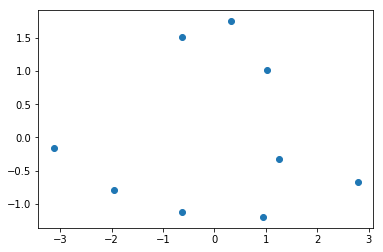

In [17]:
# projection sur les deux premiers axes
X = scores.T[0]
Y = scores.T[1]
plt.scatter(X,Y)
plt.show()

In [18]:
# projection sur le cercle des correlations
sat = np.array([[np.dot(mat1_c.T[i],scores.T[j])/(9*(D[j]**(1/2))) for i in range(5)] for j in range(3)]).T
sat

array([[-0.80590635, -0.57135843,  0.15344338],
       [-0.89700978, -0.43079152,  0.09285091],
       [-0.75808764,  0.61104694, -0.22570903],
       [-0.91025382,  0.39749027, -0.10842325],
       [-0.06668631,  0.32752476,  0.94248311]])

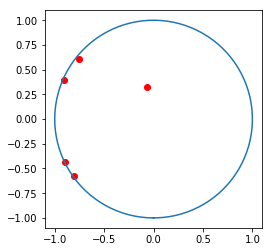

In [19]:
# cercle des corrélations pour les deux premiers axes
X = sat.T[0]
Y = sat.T[1]
fig = plt.figure()
ax = plt.axes()
ax.set_aspect(1)
theta = np.linspace(-np.pi, np.pi, 200)
plt.plot(np.sin(theta), np.cos(theta))
plt.scatter(X,Y, color='r')
plt.show()